<a href="https://colab.research.google.com/github/SushantVij/NLP-CV-IOT-UCS657-/blob/main/RISE11_MNB_AND_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [145]:
df = pd.read_csv('/content/train.csv')

**PRE-PROCESSING**

In [146]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [147]:
# @title Default title text
# Preprocess the data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [148]:
def preprocess_text_parallel(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_parallel(column):
    return Parallel(n_jobs=-1)(delayed(preprocess_text_parallel)(text) for text in column)

df['text_cleaned'] = preprocess_parallel(df['text'])

In [150]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['Y'], test_size=0.2, random_state=42)

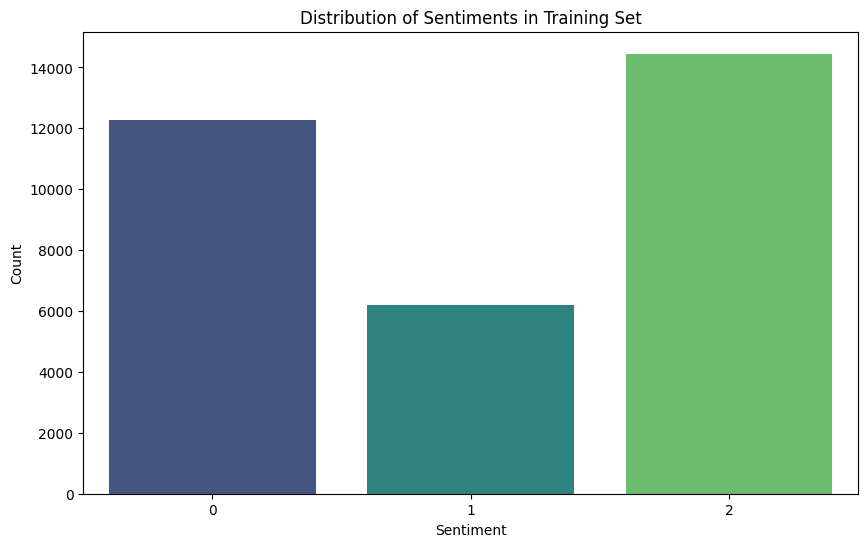

In [151]:
# Visualize the distribution of sentiments in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, data=X_train, palette='viridis')
plt.title('Distribution of Sentiments in Training Set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

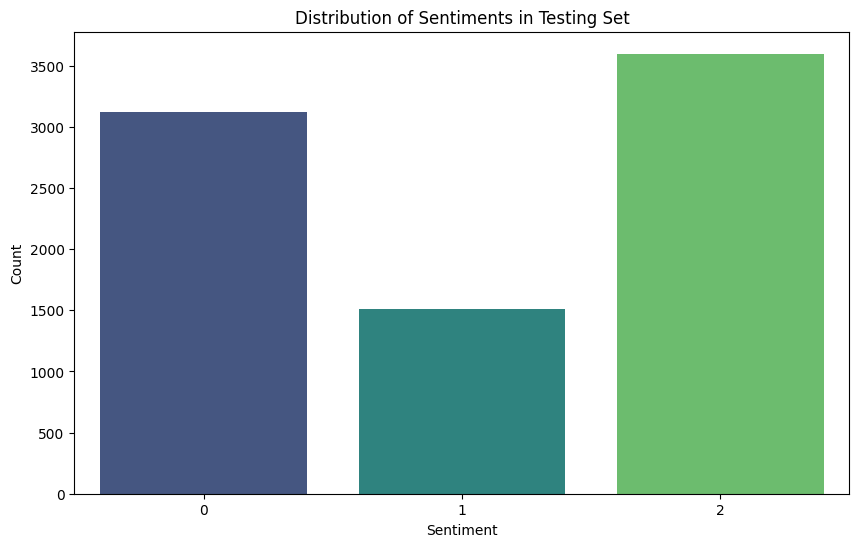

In [152]:
# Visualize the distribution of sentiments in the testing set
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, data=X_test, palette='viridis')
plt.title('Distribution of Sentiments in Testing Set')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [153]:
# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

**MULTINOMIAL NAIVE BIAS**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Apply Multinomial Naive Bayes
model = MultinomialNB()

In [ ]:
# Stratified Sampling
stratified_sampling = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cross-validation with stratified sampling
cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=stratified_sampling, scoring='accuracy')

In [ ]:
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores:
[0.66924829 0.68727217 0.68362697 0.68332321 0.68377886]
Mean CV Accuracy: 0.6814499013277165


In [ ]:
# Fit the classifier on the training data
model.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.6861863686064876

Confusion Matrix:
[[2343   90  690]
 [ 457  352  702]
 [ 535  109 2953]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      3123
           1       0.64      0.23      0.34      1511
           2       0.68      0.82      0.74      3597

    accuracy                           0.69      8231
   macro avg       0.67      0.60      0.60      8231
weighted avg       0.68      0.69      0.66      8231



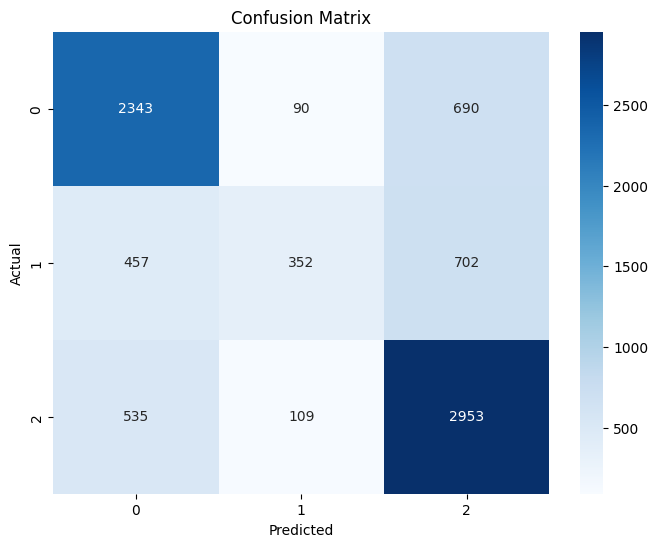

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Support Vector Machine (SVM) classifier**

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample



In [ ]:
# Choosing a pre-trained model or creating your own
# Here, we'll use an SVM with TF-IDF Vectorizer
model_SVC = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

In [ ]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(kernel='linear'))])

5min47sec

In [ ]:
# Testing
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

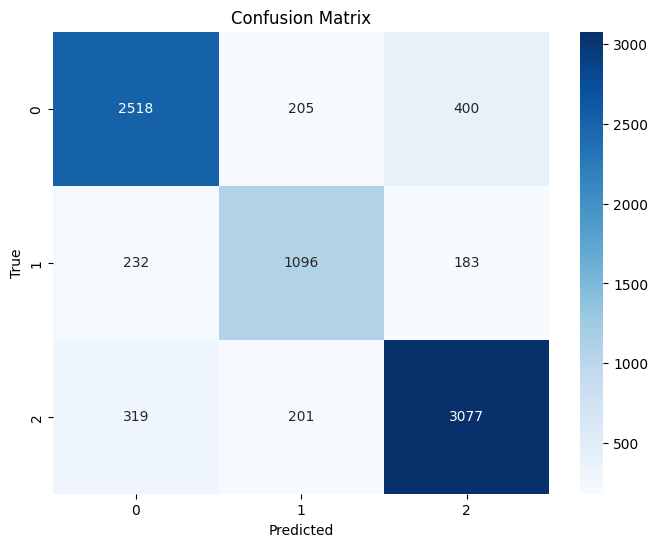

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Additional metrics and analysis
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8129024419876079

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      3123
           1       0.73      0.73      0.73      1511
           2       0.84      0.86      0.85      3597

    accuracy                           0.81      8231
   macro avg       0.80      0.80      0.80      8231
weighted avg       0.81      0.81      0.81      8231

